# 🏠💰 House Price Predictions 

Author: [Enrique Companioni](https://github.com/EnriqManComp)

**<p style="font-size:20px">💾 Data Insights</p>**

<ul style="font-size:16px">
    <li>The dataset contains many missing values and outliers. These missing values are mainly in categorical features, where the absence of the feature is represented with a NaN value. The outliers are across various features, but they become particularly noticeable when the sale price is high.</li>
        <li>The data is right-skewed in the majority of the features, included the Sale Price of the Houses.</li>
        <li>The target value (Sale Price of the Houses) is correlated with Overall Quality and Ground Living Area, and to some degree with Garage Cars and Garage Area.</li>            
</ul>    


**<p style="font-size:20px">🔄 Data Processing</p>**

<ul style="font-size:16px">
    <li><b>Handling Outliers:</b> The most correlated features with the sale price of the houses were treated by removing their most influential outliers.</li>
        <li><b>Handling Missing Values:</b> The missing values in the categorical features, where absence of the feature was recorded as NaN, were filled with the appropriate value of "No ...(feature related)". Additionally, the absence of the feature induced NaN values in other numerical features, so they were filled with the appropriate values.</li>       
        <li><b>Transform skewed data:</b> Skewed data was transformed to achieve a more normal distribution.</li>        
        <li><b>Encoding data:</b> The categorical data was encoded using Label Encoding for features that were naturally label-encoded. Additionally, the categorical features were transformed using the get_dummies function from the pandas library.</li>   
        <li><b>Add Missing Categorical Features:</b> After removing outliers, some categories were lost. Therefore, the encoded columns need to be added back before passing through the models. Additionally, some columns were reordered.</li>        
    </ul>    

**<p style="font-size:20px">🧠 Modelling</p>**

<p style="font-size:18px">Eight models (Lasso, Ridge, Support Vector Machine, Elastic Net, KNN, Random Forest, XGBoost, and Gradient Boosting) were trained using the K-Fold technique, specifically with k=7. Then, the best models were chosen and different combinations of predictions were tried to determine the best performance with all the data. Finally, a 50/50 weighted combination of predictions from the Gradient Boosting model and the XGBoost model was chosen. The performance of each model was as follows:</p>

<table style="font-size:16px">
    <tr>
        <th>Model</th>
        <th>Mean score</th>
        <th>Mean RMSE</th>
    </tr>    
    <tr>
        <td>Ridge</td>
        <td>0.8943</td>
        <td>0.1319</td>
    </tr>
    <tr>
        <td>SVM</td>
        <td>0.9173</td>
        <td>0.1159</td>
    </tr>
    <tr>
        <td>ElasticNet</td>
        <td>0.9023</td>
        <td>0.1230</td>
    </tr>
    <tr>
        <td>KNN</td>
        <td>0.8600</td>
        <td>0.1359</td>
    </tr>
    <tr>
        <td>RF</td>
        <td>0.8652</td>
        <td>0.1504</td>
    </tr>
    <tr>
        <td>XGBoost</td>
        <td>0.8991</td>
        <td>0.1243</td>
    </tr>
    <tr>
        <td>GBR</td>
        <td>0.9385</td>
        <td>0.0930</td>
    </tr>
</table>

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt

# Statistical library
from scipy import stats
from scipy.stats import norm, skew 

# Missing value visualization
import missingno as msno

# Seaborn configuration style
sns.set_style("darkgrid")

# Import data

In [2]:
# Read data
train_dataset = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# Dataset dimensions
print(f"Shape of the dataset: {train_dataset.shape}")
# Show data sample
train_dataset.head()

Shape of the dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis (EDA)

### Check for Duplicates and Drop the ID Column

In [3]:
print("There are {0} duplicated Ids".format(train_dataset['Id'].duplicated().sum()))
# Drop Id column
train_dataset = train_dataset.drop(['Id'], axis=1)

There are 0 duplicated Ids


### Check dataset dtype

In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Exploring the Sale Price column

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


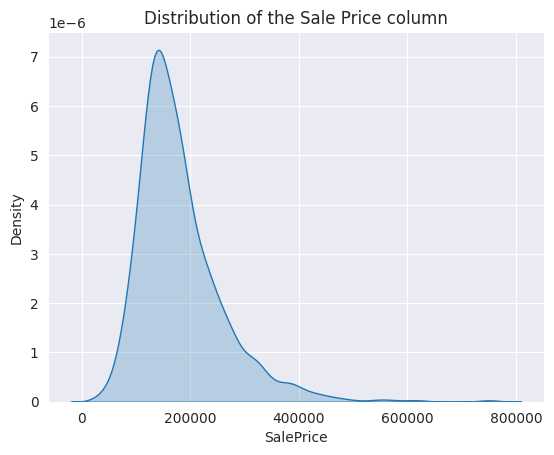

In [5]:
# Distribution of the sale price column
sns.kdeplot(
    data=train_dataset,
    x="SalePrice",    
    fill=True    
)
plt.title("Distribution of the Sale Price column")
plt.show()

## Correlation Between the Features

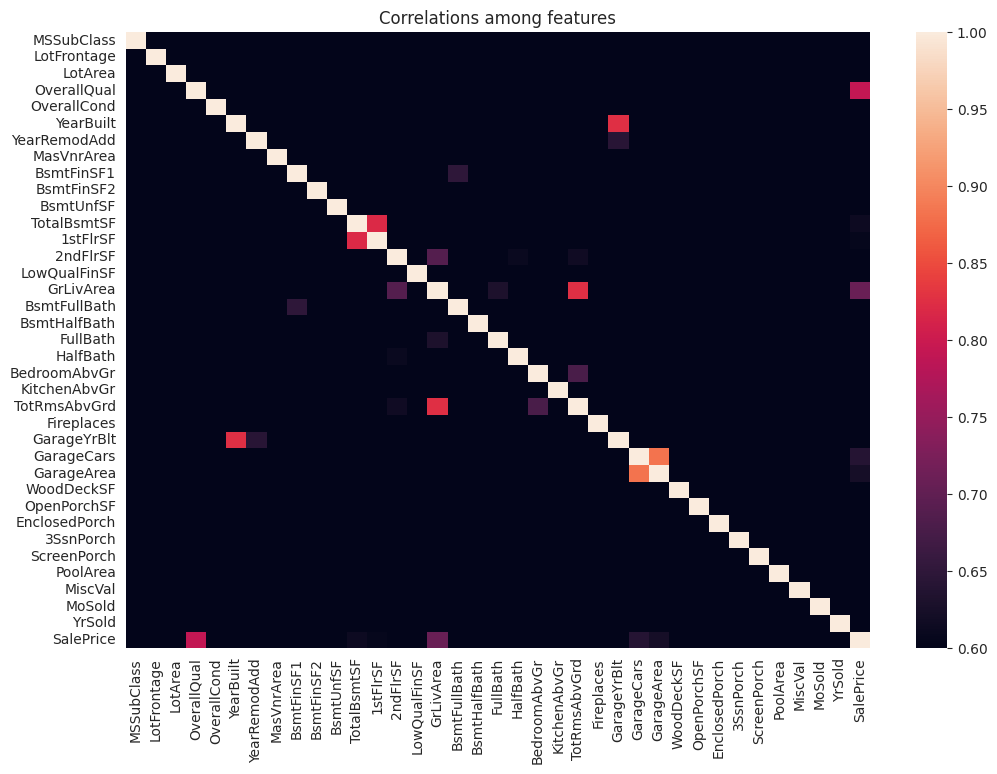

In [6]:
# Heat map of correlations among features
plt.subplots(figsize=(12,8))
sns.heatmap(data=train_dataset.corr(numeric_only=True), vmin=0.6)
plt.title("Correlations among features")
plt.show()

**<p style="font-size:16px">Relationship between Sale Price and OverallQual, GrLivArea, GarageCars, and  GarageArea</p>**

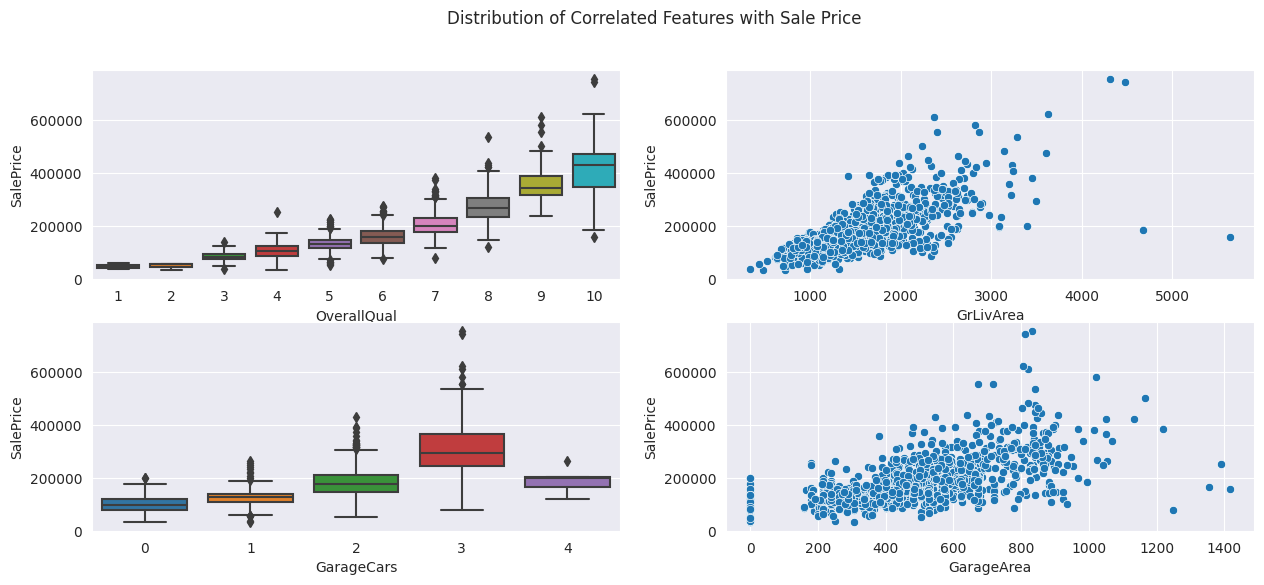

In [7]:
fig, axs = plt.subplots(2,2, figsize=(15, 6))
sns.boxplot(x='OverallQual', y="SalePrice", data=train_dataset, ax=axs[0,0])
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_dataset, ax=axs[0,1])
sns.boxplot(x='GarageCars', y="SalePrice", data=train_dataset, ax=axs[1,0])
sns.scatterplot(x='GarageArea', y="SalePrice", data=train_dataset, ax=axs[1,1])
plt.suptitle("Distribution of Correlated Features with Sale Price")
plt.show()

## Remove Outliers

In [8]:
train_dataset = train_dataset.loc[(train_dataset['SalePrice'] <= 600_000) & (train_dataset['GrLivArea'] <= 4000), :]
train_dataset = train_dataset.loc[(train_dataset['SalePrice'] <= 600_000) & (train_dataset['GarageArea'] <= 1200), :]
train_dataset = train_dataset.loc[(train_dataset['SalePrice'] <= 600_000) & (train_dataset['GarageCars'] <=4 ), :]
train_dataset.shape

(1450, 80)

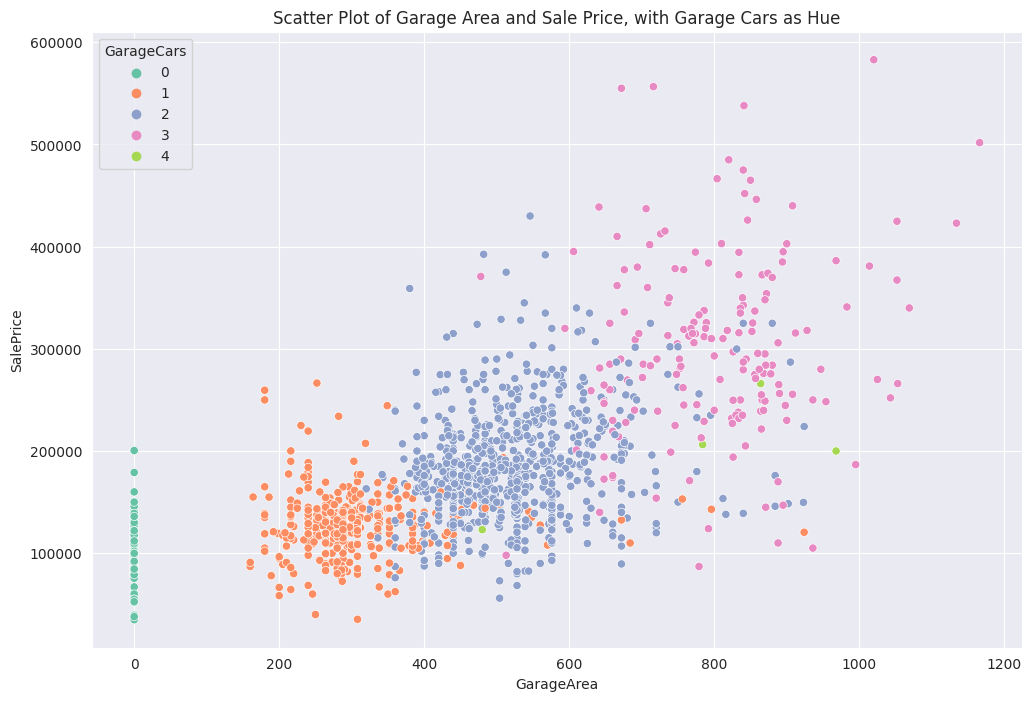

In [9]:
# Scatter Plot of Garage Area and Sale Price, with Garage Cars as Hue
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data=train_dataset, x='GarageArea', y='SalePrice', hue='GarageCars', palette="Set2")
plt.title("Scatter Plot of Garage Area and Sale Price, with Garage Cars as Hue")
plt.show()

There are only 4 instances where houses have 4 cars without any notable pattern. Therefore, these values may introduce some noise into the future model.

In [10]:
train_dataset = train_dataset.loc[train_dataset['GarageCars'] < 4, :]
train_dataset.shape

(1446, 80)

**<p style="font-size:16px">Transform Sale Price data to a Normal distribution using the transformation 1 + log(x)</p>**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


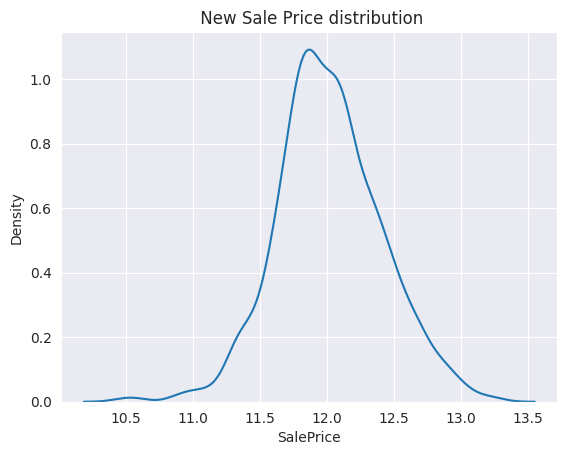

In [11]:
train_dataset['SalePrice'] = np.log1p(train_dataset['SalePrice'])

# New distribution of Sale Price
sns.kdeplot(train_dataset['SalePrice'])
plt.title(' New Sale Price distribution')
plt.show()

## Handling Missing Values

<Axes: >

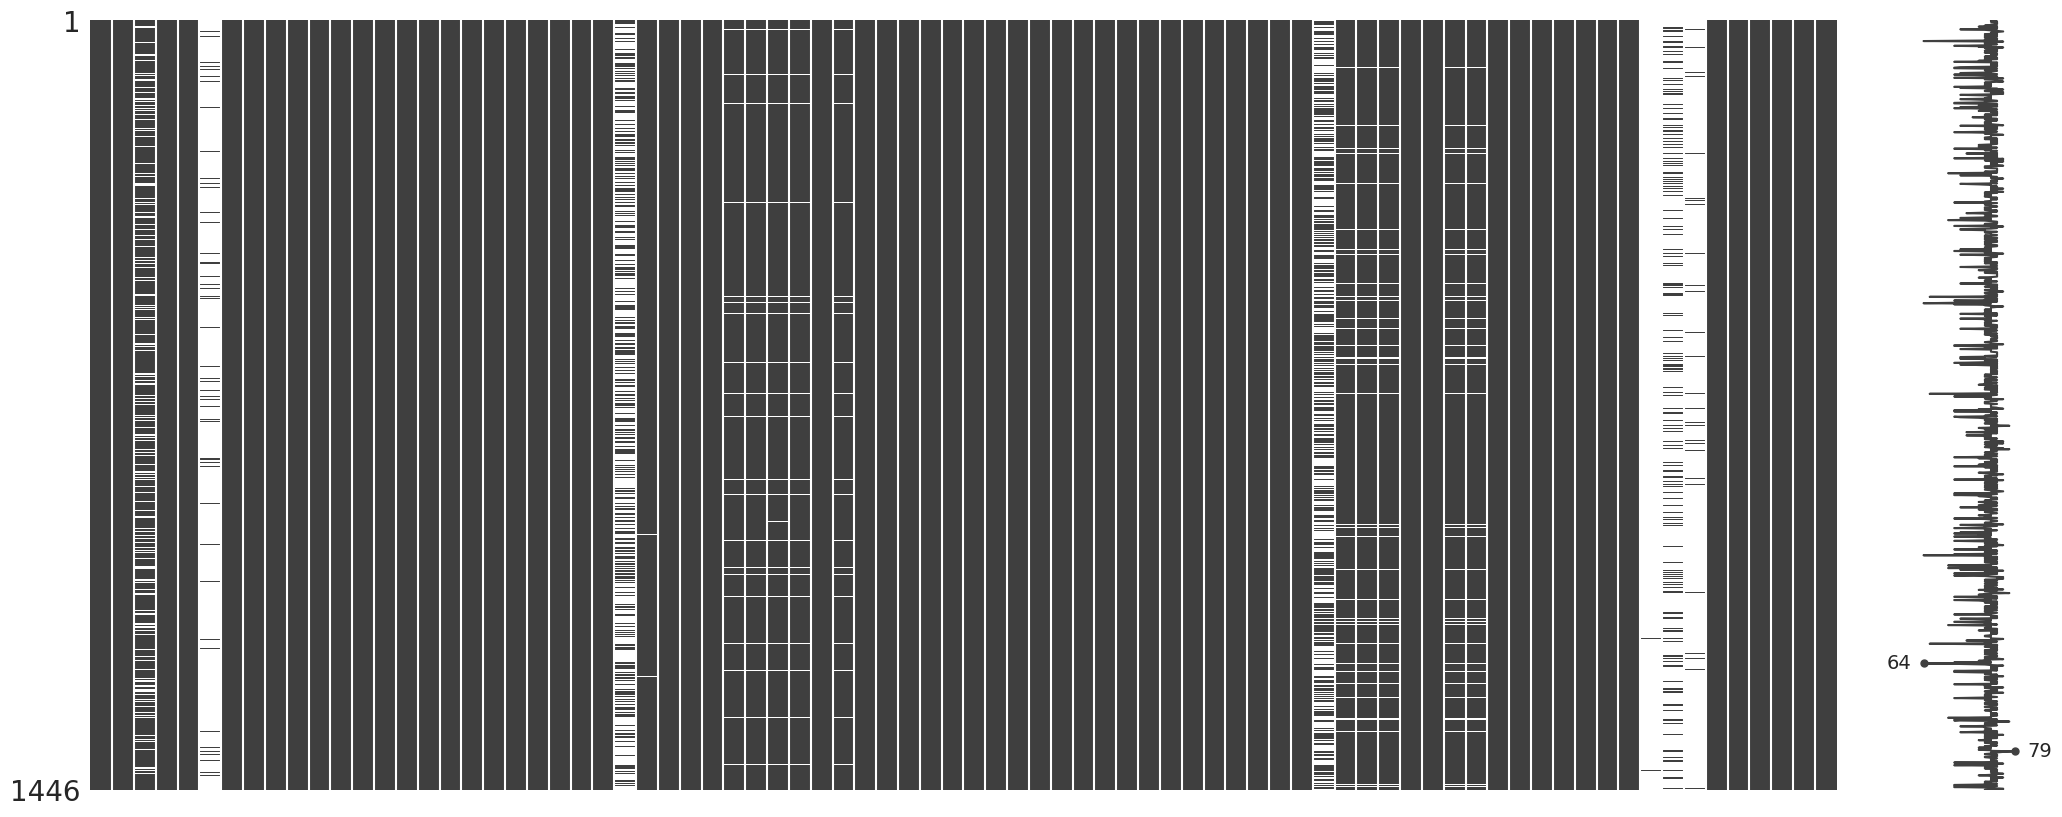

In [12]:
# Visualize missing values
msno.matrix(train_dataset)

In [13]:
# Check the columns with missing values
print(train_dataset.columns[train_dataset.isna().sum() > 0])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


**<p style="font-size:16px">Proportion of missing values in each column</p>**

In [14]:
def proportion_miss_values(column):
    miss_value_sum = train_dataset[column].isna().sum() 
    return pd.Series(miss_value_sum / train_dataset.shape[0], index=[column])

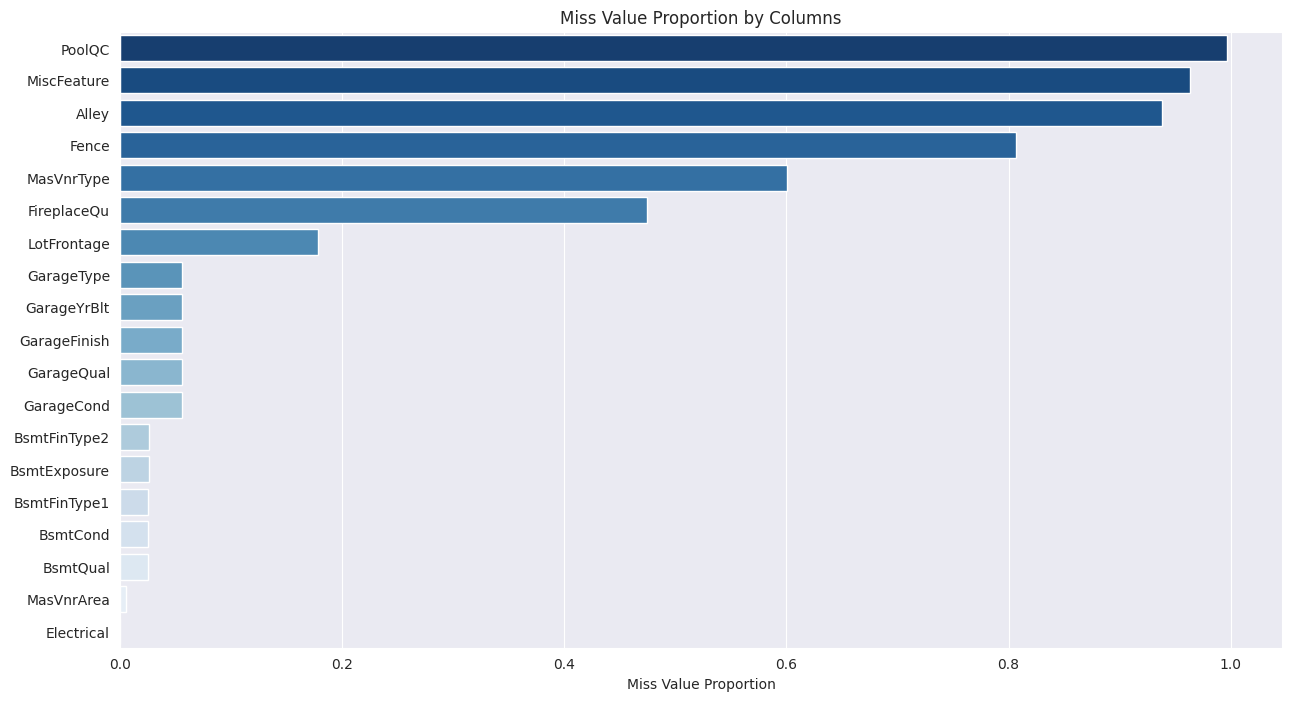

In [15]:
proportion_df = pd.DataFrame([])
missing_columns = train_dataset.columns[train_dataset.isna().sum() > 0]
for i, column in enumerate(missing_columns):
    new_proportion = proportion_miss_values(column)
    proportion_df = pd.concat([proportion_df, new_proportion], axis=0)     

proportion_df.columns = ['miss_value_proportion']
proportion_df = proportion_df.sort_values('miss_value_proportion', ascending=False)
fig = plt.figure(figsize=(15,8))
sns.barplot(data=proportion_df, y=proportion_df.index, x='miss_value_proportion', palette="Blues_r", orient='h')
plt.xlabel("Miss Value Proportion")
plt.title("Miss Value Proportion by Columns")
plt.show()

**<p style="font-size:16px">Distribution of MasVnrArea and Count of MasVnrType</p>**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


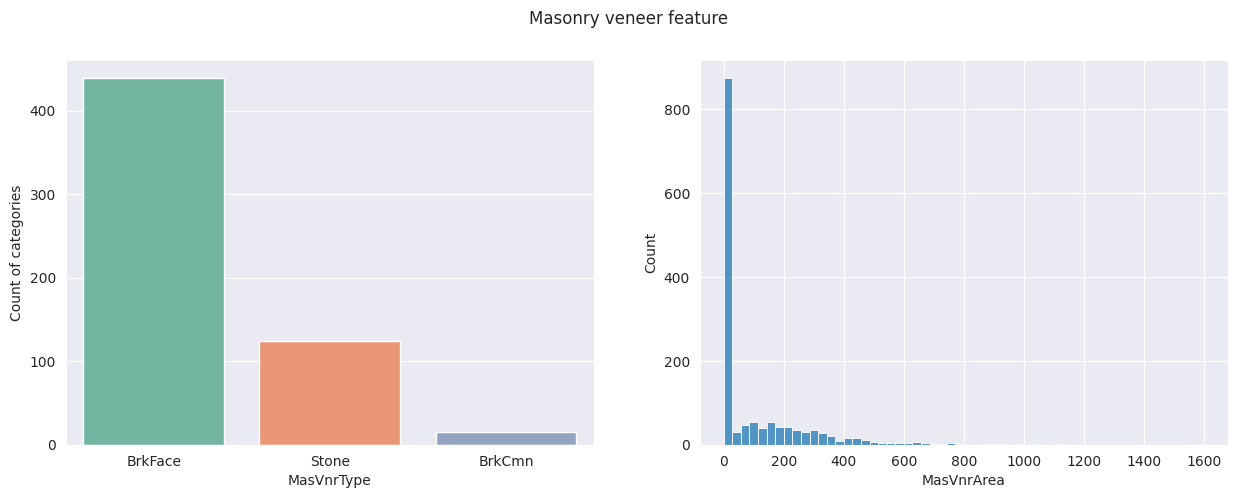

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=train_dataset, x='MasVnrType', palette="Set2", ax=axs[0]).set_ylabel("Count of categories")
sns.histplot(train_dataset['MasVnrArea'], ax=axs[1])
plt.suptitle("Masonry veneer feature")
plt.show()

**<p style="font-size:16px">Distribution of LotArea and Count of LotFrontage</p>**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


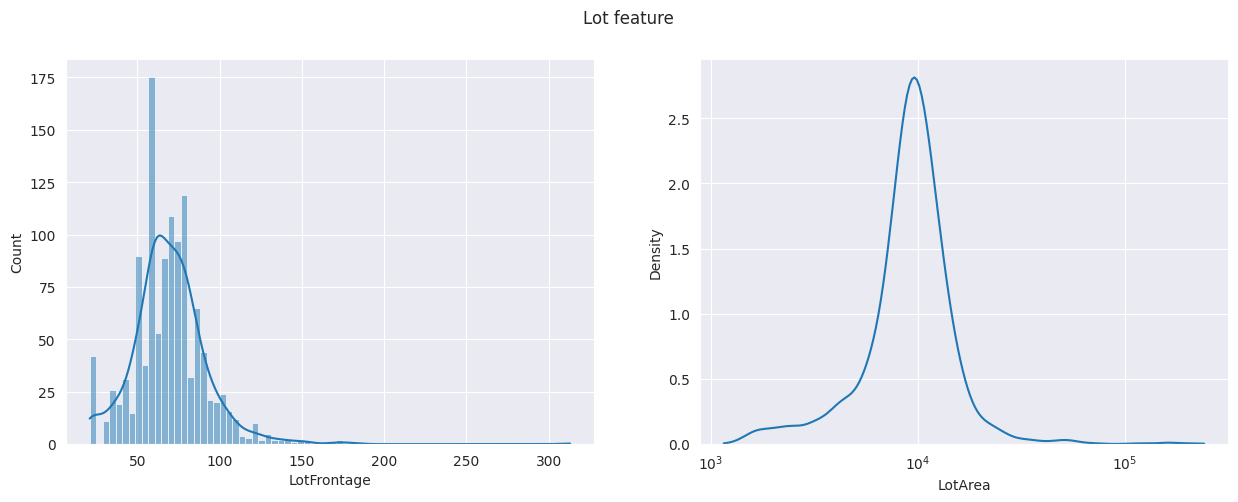

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=train_dataset, x='LotFrontage', kde=True, ax=axs[0])
sns.kdeplot(train_dataset['LotArea'], cut=1, log_scale=True, ax=axs[1])
plt.suptitle("Lot feature")
plt.show()

**<p style="font-size:16px">Count of Electrical feature</p>**

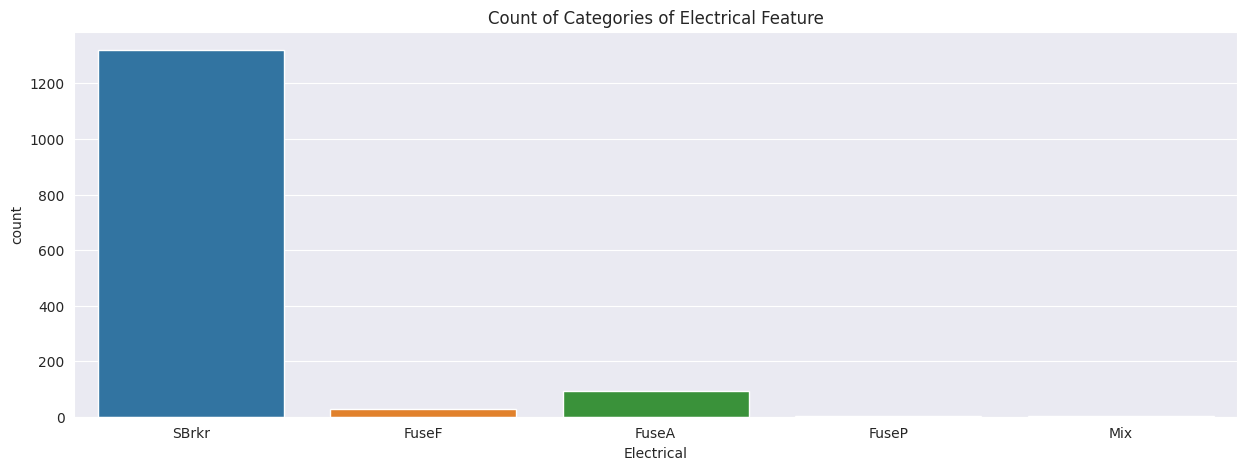

In [18]:
plt.subplots(figsize=(15,5))
sns.countplot(data=train_dataset, x='Electrical')
plt.title("Count of Categories of Electrical Feature")
plt.show()

**<p style="font-size:16px">Values to Fill in Missing Values by Columns</p>**

In [19]:
# Categorical columns where missing values were found
target_missing_columns = {
    "Alley": "No Alley",
    "LotFrontage": np.median(train_dataset[~train_dataset['LotFrontage'].isna()]['LotFrontage']),
    "MasVnrType": "None",
    "BsmtQual": "No basement",
    "BsmtCond": "No basement",
    "BsmtExposure": "No basement",
    "BsmtFinType1": "No basement",
    "BsmtFinType2": "No basement",
    "FireplaceQu": "No Fireplace",
    "GarageType": "No Garage",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "GarageCond": "No Garage",
    "PoolQC": "No Pool",
    "Fence": "No Fence",
    "MiscFeature": "None",
    "Electrical": "SBrkr"
}
# Dependent columns
missing_dependent_columns = {
    "MasVnrArea": ["MasVnrType", "None"],
    "GarageYrBlt": ["GarageType", "No Garage"]    
}

### Handling missing categories

In [20]:
for column, fill_value in target_missing_columns.items():    
    train_dataset[column] = train_dataset[column].fillna(fill_value) 

### Handling missing values of dependent columns

In [21]:
for dependent_column, (column, value) in missing_dependent_columns.items():
    train_dataset.loc[train_dataset[column] == value, dependent_column] = 0    

<Axes: >

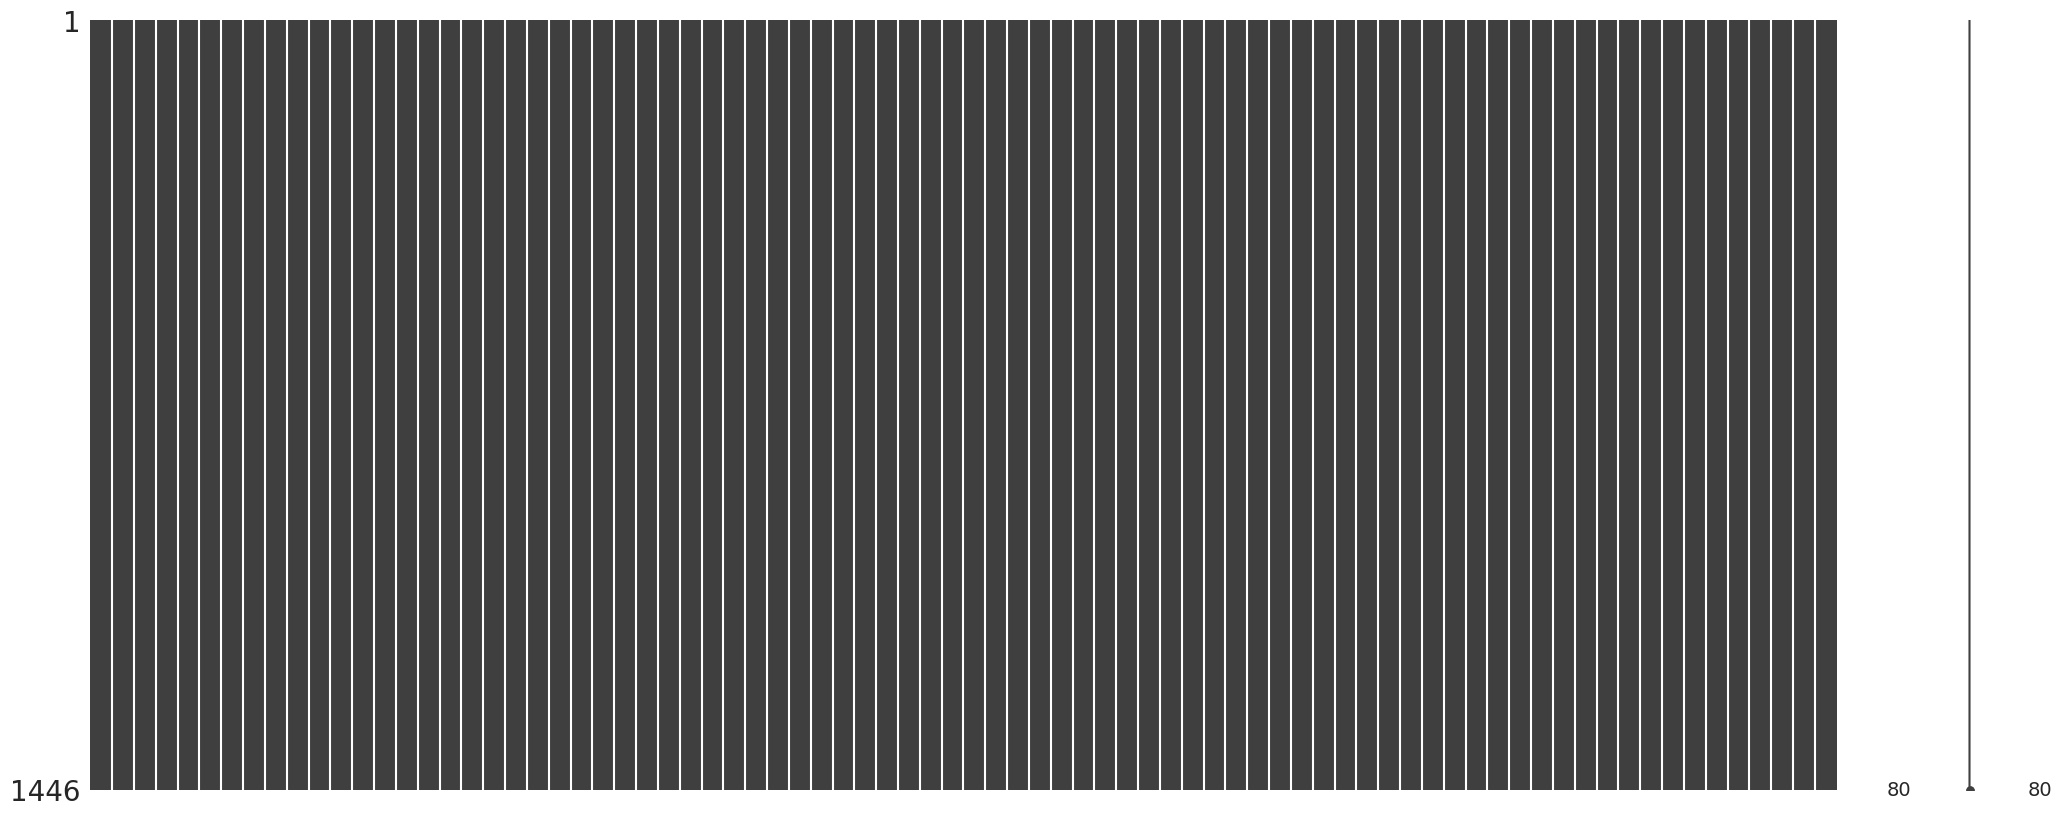

In [22]:
# Visualize missing values
msno.matrix(train_dataset)

## Correction of Fields

**<p style="font-size:16px">Convert all the categorical columns to object type</p>**

In [23]:
# Categorical columns
categorical_columns = (
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", \
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", \
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", \
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", \
    "KitchenQual", "Functional", \
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", \
    "MiscFeature", "YrSold", "SaleType", "SaleCondition"    
)
# Columns with natural label encoding
nat_label_encoding = [
    "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", \
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", \
    "Fireplaces", "GarageCars", "MoSold"
]

In [24]:
# Check types of auto label encode columns
train_dataset[list(nat_label_encoding)].dtypes

OverallQual     int64
OverallCond     int64
BsmtFullBath    int64
BsmtHalfBath    int64
FullBath        int64
HalfBath        int64
BedroomAbvGr    int64
KitchenAbvGr    int64
TotRmsAbvGrd    int64
Fireplaces      int64
GarageCars      int64
MoSold          int64
dtype: object

In [25]:
def change_dtype(dataset, column, type):
    """
        To change the type of the columns of the dataset
        Args:
            dataset (pandas DataFrame)
            column (string): Columns to change
            type (string): New type for the columns
    """
    return dataset[column].astype(type)

# Convert to categorical type
for cat_column in categorical_columns:
    train_dataset[cat_column] = change_dtype(train_dataset, cat_column, "object")

In [26]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1446 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1446 non-null   object 
 1   MSZoning       1446 non-null   object 
 2   LotFrontage    1446 non-null   float64
 3   LotArea        1446 non-null   int64  
 4   Street         1446 non-null   object 
 5   Alley          1446 non-null   object 
 6   LotShape       1446 non-null   object 
 7   LandContour    1446 non-null   object 
 8   Utilities      1446 non-null   object 
 9   LotConfig      1446 non-null   object 
 10  LandSlope      1446 non-null   object 
 11  Neighborhood   1446 non-null   object 
 12  Condition1     1446 non-null   object 
 13  Condition2     1446 non-null   object 
 14  BldgType       1446 non-null   object 
 15  HouseStyle     1446 non-null   object 
 16  OverallQual    1446 non-null   int64  
 17  OverallCond    1446 non-null   int64  
 18  YearBuilt    

# Preprocessing Data

In [27]:
# Get the features and labels
X = train_dataset.iloc[:, :-1]
y = train_dataset.iloc[:, -1]

## Convert to Label Encoding

<p style="font-size:16px">Target features for label encoding</p>

In [28]:
# List of categorical columns to Label Encoding
target_le_columns = (
    "MSSubClass", "LotShape", "LandContour", "LandSlope", \
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", \
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", \
    "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual", \
    "GarageCond", "PavedDrive", "PoolQC", "Fence", "YrSold"    
)

**Apply Label Encoding to the data**

In [29]:
from sklearn.preprocessing import LabelEncoder

for column in target_le_columns:
    # Encoder
    encoder = LabelEncoder()    
    X[column] = encoder.fit_transform(X[column].values)
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,RL,65.0,8450,Pave,No Alley,3,3,AllPub,Inside,...,0,0,3,4,None,0,2,2,WD,Normal
1,0,RL,80.0,9600,Pave,No Alley,3,3,AllPub,FR2,...,0,0,3,4,None,0,5,1,WD,Normal
2,5,RL,68.0,11250,Pave,No Alley,0,3,AllPub,Inside,...,0,0,3,4,None,0,9,2,WD,Normal
3,6,RL,60.0,9550,Pave,No Alley,0,3,AllPub,Corner,...,0,0,3,4,None,0,2,0,WD,Abnorml
4,5,RL,84.0,14260,Pave,No Alley,0,3,AllPub,FR2,...,0,0,3,4,None,0,12,2,WD,Normal


**<p style="font-size:16px">Check skewness of the features</p>**

In [30]:
numeric_feats = X.dtypes[X.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.362801
PoolArea,17.443752
LotArea,12.690108
3SsnPorch,10.242946
LowQualFinSF,8.957238
LandSlope,4.820239
KitchenAbvGr,4.540317
BsmtFinSF2,4.227465
BsmtHalfBath,4.140732
ScreenPorch,4.094910


**<p style="font-size:16px">Transform to Normal distribution using 1 + log(x)</p>**

In [31]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index

for feat in skewed_features:    
    X[feat] = np.log1p(X[feat])

**<p style="font-size:16px">Convert Categorical Variables to Dummy Variables</p>**

In [32]:
X = pd.get_dummies(X)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.791759,4.189655,9.042040,1.386294,1.386294,0.0,2.079442,1.791759,7.602900,7.602900,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,4.394449,9.169623,1.386294,1.386294,0.0,1.945910,2.197225,7.589336,7.589336,...,False,False,False,True,False,False,False,False,True,False
2,1.791759,4.234107,9.328212,0.000000,1.386294,0.0,2.079442,1.791759,7.601902,7.602401,...,False,False,False,True,False,False,False,False,True,False
3,1.945910,4.110874,9.164401,0.000000,1.386294,0.0,2.079442,1.791759,7.557995,7.586296,...,False,False,False,True,True,False,False,False,False,False
4,1.791759,4.442651,9.565284,0.000000,1.386294,0.0,2.197225,1.791759,7.601402,7.601402,...,False,False,False,True,False,False,False,False,True,False


In [33]:
X = X.reset_index(drop=True)

**Add Missing Category Due to Outlier Removal**


This is needed to match the order of columns between the test data and train data.

In [34]:
# Fill mising columns after dummies convertion
new_column = pd.Series([False] * X.shape[0], name='Condition2_PosN')
first_div_X = X.iloc[:,:109]
print(first_div_X.shape)
print(first_div_X.shape)
second_div_X = X.iloc[:,109:]
print(second_div_X.shape)
first_div_X = pd.concat([first_div_X, new_column], axis=1)
X = pd.concat([first_div_X, second_div_X], axis=1)
X.head()

(1446, 109)
(1446, 109)
(1446, 118)


,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.791759,4.189655,9.042040,1.386294,1.386294,0.0,2.079442,1.791759,7.602900,7.602900,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,4.394449,9.169623,1.386294,1.386294,0.0,1.945910,2.197225,7.589336,7.589336,...,False,False,False,True,False,False,False,False,True,False
2,1.791759,4.234107,9.328212,0.000000,1.386294,0.0,2.079442,1.791759,7.601902,7.602401,...,False,False,False,True,False,False,False,False,True,False
3,1.945910,4.110874,9.164401,0.000000,1.386294,0.0,2.079442,1.791759,7.557995,7.586296,...,False,False,False,True,True,False,False,False,False,False
4,1.791759,4.442651,9.565284,0.000000,1.386294,0.0,2.197225,1.791759,7.601402,7.601402,...,False,False,False,True,False,False,False,False,True,False


# Modeling

In [35]:
# Base models
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

## Possible Base Models

**All the hyperparameters were found using GridSearchCV.**

In [36]:
# Ridge model
ridge_model = Ridge(alpha=0.5, solver="lsqr", random_state=11)
# ElasticNet model
elastic_net_model = ElasticNet(alpha=0.0005, l1_ratio=0.9, selection="random", random_state=12)
# SVM model
svr_model = SVR(C=0.05, kernel="linear", gamma="scale")
# KNN model
knn_model = KNeighborsRegressor(n_neighbors=5, weights="distance", metric="manhattan", algorithm="auto")
# Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=3000,
    max_depth=7,
    min_samples_leaf=15,
    min_samples_split=10,
    random_state=14
)
# XGBoost model
xgboost_model = XGBRegressor(
    learning_rate=0.01,
    n_estimators=6000,
    max_depth=4,
    objective='reg:squarederror',
    nthread=-1,
    random_state=15
)
# GradientBoosting model
gbr_model = GradientBoostingRegressor(
    n_estimators=3000,
    max_depth=5,
    min_samples_leaf=15,
    min_samples_split=10,
    loss="huber",
    max_features="sqrt",
    random_state=15
)

### Perform Cross-validation to Identify the Best Base Models

In [37]:
# Set the Folds
n_folds = 7
kf = KFold(n_folds, shuffle=True, random_state=42)

Get the 7-Fold split data

In [38]:
X_train_folds, X_test_folds = [], []
y_train_folds, y_test_folds = [], []
# Get the splitted data
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
    X_train_folds.append(X.iloc[train_index])
    X_test_folds.append(X.iloc[test_index])
    y_train_folds.append(y.iloc[train_index])
    y_test_folds.append(y.iloc[test_index])

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6


In [39]:
print(f"Shape of X train folds: {len(X_train_folds)}x{len(X_train_folds[0])}, Shape of X test folds: {len(X_test_folds)}x{len(X_test_folds[0])}")

Shape of X train folds: 7x1239, Shape of X test folds: 7x207


### Train and Test Base Models

In [40]:
# Save the scores of the models
scores = np.empty((7,1))
# Save the rmse of the models
rmse = np.empty((7,1))

models = [ridge_model, svr_model, elastic_net_model, knn_model, rf_model, xgboost_model, gbr_model]

for i, (X_train, X_test, y_train, y_test, model) in enumerate(zip(X_train_folds, X_test_folds, y_train_folds, y_test_folds, models)):    
    print(f"Fold {i+1}")      
    
    if i < 4:
        # Scale the feature data
        rs = RobustScaler()    
        scaled_X_train = rs.fit_transform(X_train)
        scaled_X_test = rs.transform(X_test)
        
        model.fit(scaled_X_train, y_train)
        
        scores[i,0] = model.score(scaled_X_test, y_test)
        model_pred = model.predict(scaled_X_test)
        rmse[i,0] = np.sqrt(mean_squared_error(y_test, model_pred))        
    else:
        
        model.fit(X_train, y_train)
        
        scores[i,0] = model.score(X_test, y_test)
        model_pred = model.predict(X_test)
        rmse[i,0] = np.sqrt(mean_squared_error(y_test, model_pred))


Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7


In [41]:
print(f"Ridge mean score: {scores[0].mean()}, Ridge std: {scores[0].std()}, RMSE: {rmse[0].mean()}, {rmse[0].std()}")
print(f"SVM mean score: {scores[1].mean()}, SVM std: {scores[1].std()}, RMSE: {rmse[1].mean()}, {rmse[1].std()}")
print(f"ElasticNet mean score: {scores[2].mean()}, ElasticNet std: {scores[2].std()}, RMSE: {rmse[2].mean()}, {rmse[2].std()}")
print(f"KNN mean score: {scores[3].mean()}, KNN std: {scores[3].std()}, RMSE: {rmse[3].mean()}, {rmse[3].std()}")
print(f"Random Forest mean score: {scores[4].mean()}, Random Forest std: {scores[4].std()}, RMSE: {rmse[4].mean()}, {rmse[4].std()}")
print(f"Xgboost mean score: {scores[5].mean()}, XGBoost std: {scores[5].std()}, RMSE: {rmse[5].mean()}, {rmse[5].std()}")
print(f"GBR mean score: {scores[6].mean()}, GBR std: {scores[6].std()}, RMSE: {rmse[6].mean()}, {rmse[6].std()}")

Ridge mean score: 0.8943804692711189, Ridge std: 0.0, RMSE: 0.1319718110359555, 0.0
SVM mean score: 0.9173178161900597, SVM std: 0.0, RMSE: 0.11598387651684286, 0.0
ElasticNet mean score: 0.9023330901132559, ElasticNet std: 0.0, RMSE: 0.12306808993086417, 0.0
KNN mean score: 0.8600699119113506, KNN std: 0.0, RMSE: 0.1359067931932289, 0.0
Random Forest mean score: 0.865243432370861, Random Forest std: 0.0, RMSE: 0.15048344143279735, 0.0
Xgboost mean score: 0.8991808935770946, XGBoost std: 0.0, RMSE: 0.12435591175235562, 0.0
GBR mean score: 0.9385449304983619, GBR std: 0.0, RMSE: 0.09300328082090331, 0.0


## Select the Models and Test performance

In [42]:
xgboost_pred = xgboost_model.predict(X)
gbr_pred = gbr_model.predict(X)

final_pred = 0.5 * gbr_pred +  0.5 * xgboost_pred 
rmse = np.sqrt(mean_squared_error(final_pred, y))
print("RMSE: ", str(rmse))

RMSE:  0.040427825652601876


# Predict with submission data

In [43]:
# Read data
submission_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
# Dataset dimensions
print(f"Shape of the submission data: {submission_data.shape}")
# Show data sample
submission_data.head()

Shape of the submission data: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Check for Duplicates and Save the ID Column

In [44]:
print("There are {0} duplicated Ids".format(submission_data['Id'].duplicated().sum()))
# Save Id's
submission_data_Id = submission_data['Id']
# Drop Id column
submission_data = submission_data.drop(['Id'], axis=1)

There are 0 duplicated Ids


## Handling Missing Values

<Axes: >

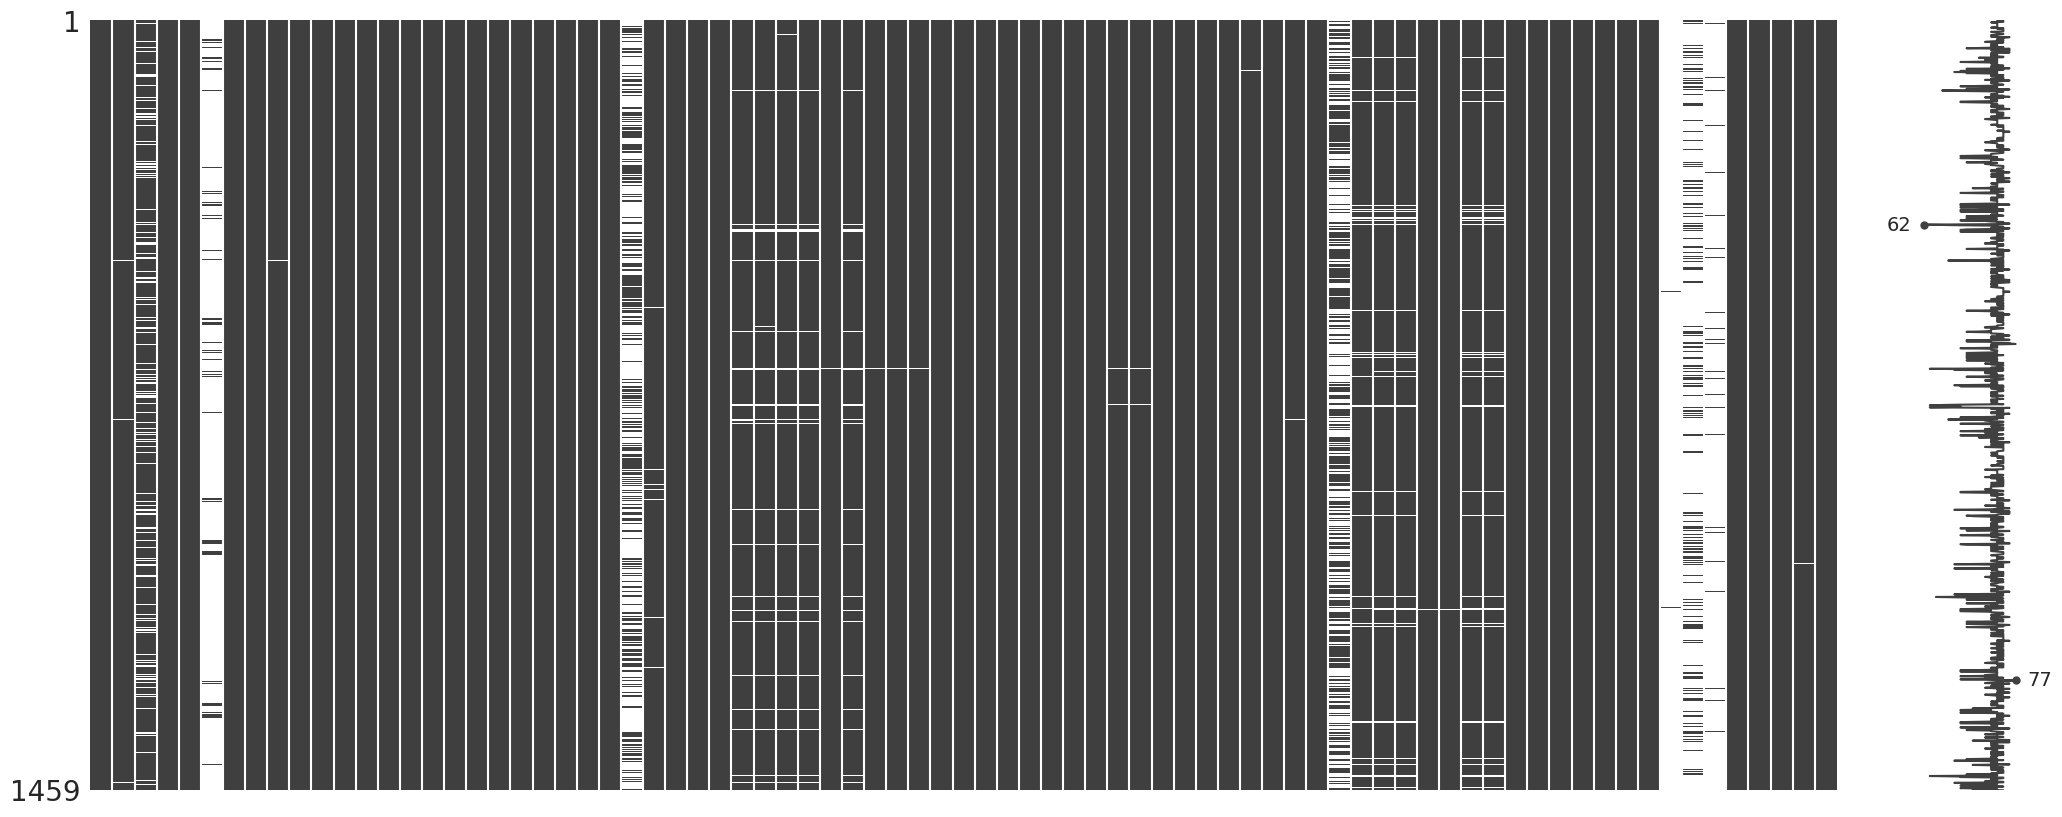

In [45]:
# Visualize missing values
msno.matrix(submission_data)

In [46]:
# Check the columns with missing values
print(submission_data.columns[submission_data.isna().sum() > 0])

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


### Proportion of Missing Values by Columns

In [47]:
def proportion_miss_values(column):
    miss_value_sum = submission_data[column].isna().sum() 
    return pd.Series(miss_value_sum / submission_data.shape[0], index=[column])

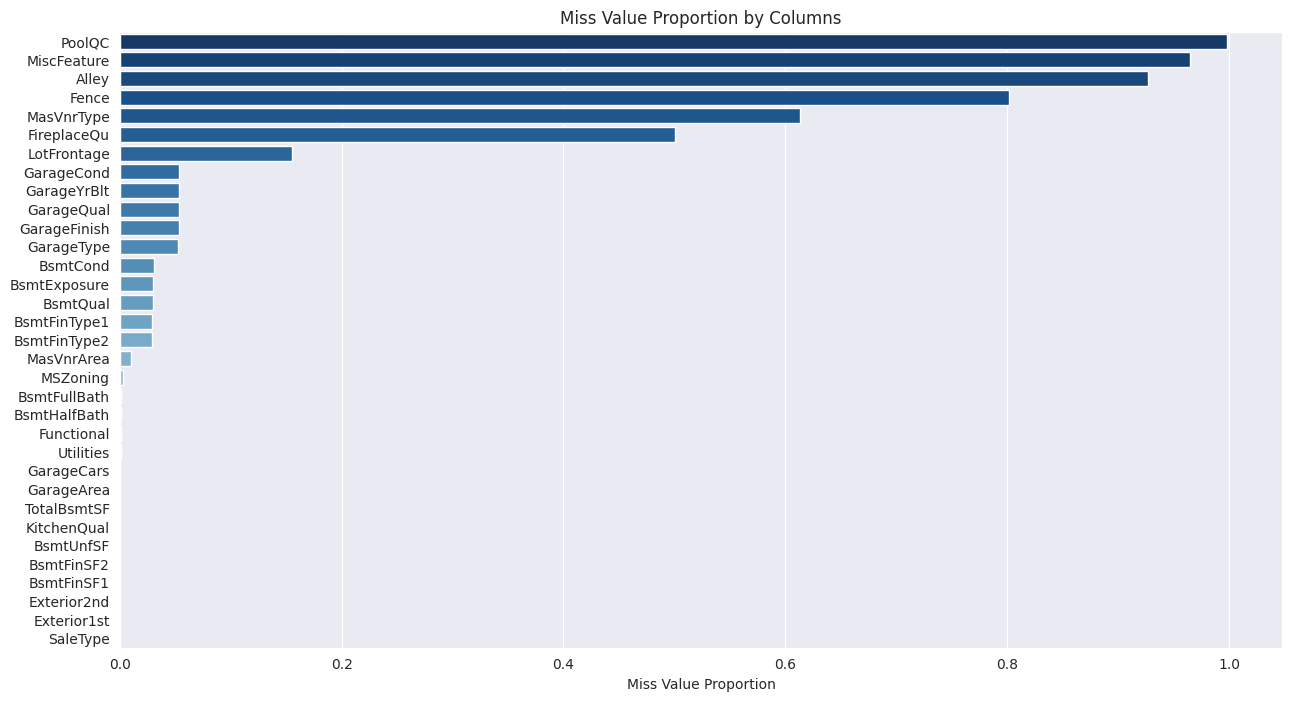

In [48]:
proportion_df = pd.DataFrame([])
missing_columns = submission_data.columns[submission_data.isna().sum() > 0]
for i, column in enumerate(missing_columns):
    new_proportion = proportion_miss_values(column)
    proportion_df = pd.concat([proportion_df, new_proportion], axis=0)     

proportion_df.columns = ['miss_value_proportion']
proportion_df = proportion_df.sort_values('miss_value_proportion', ascending=False)
fig = plt.figure(figsize=(15,8))
sns.barplot(data=proportion_df, y=proportion_df.index, x='miss_value_proportion', palette="Blues_r", orient='h')
plt.xlabel("Miss Value Proportion")
plt.title("Miss Value Proportion by Columns")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


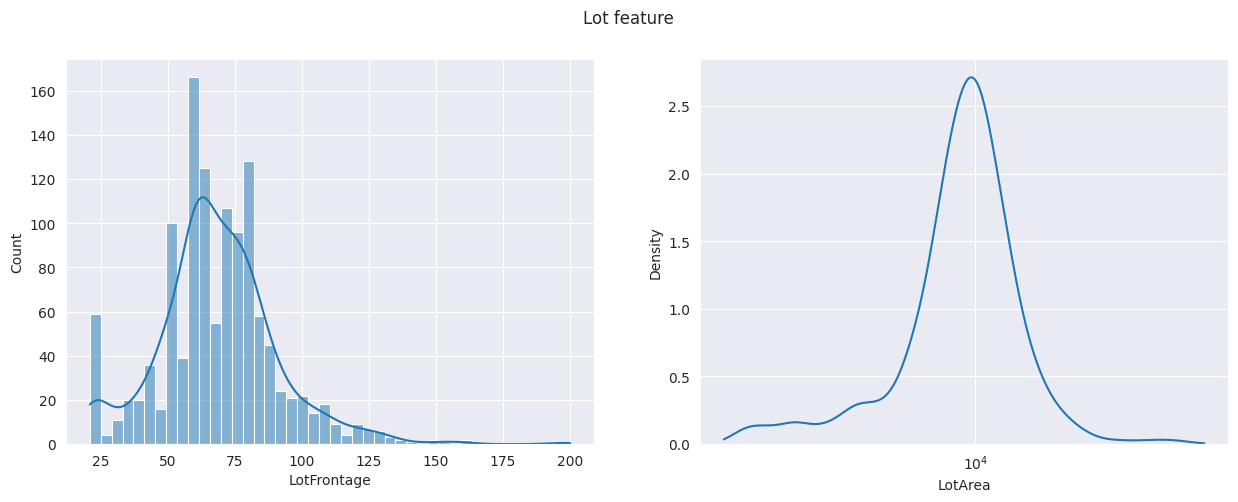

In [49]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=submission_data, x='LotFrontage', ax=axs[0], kde=True)
sns.kdeplot(submission_data['LotArea'], cut=1, log_scale=True, ax=axs[1])
plt.suptitle("Lot feature")
plt.show()

### First Cleaning of Missing Values

In [50]:
# Categorical columns where missing values were found
target_missing_columns = {
    "Alley": "No Alley",
    "LotFrontage": np.median(submission_data[~submission_data['LotFrontage'].isna()]['LotFrontage']),
    "MasVnrType": "None",
    "BsmtQual": "No basement",
    "BsmtCond": "No basement",
    "BsmtExposure": "No basement",
    "BsmtFinType1": "No basement",
    "BsmtFinType2": "No basement",
    "FireplaceQu": "No Fireplace",
    "GarageType": "No Garage",
    "GarageFinish": "No Garage",
    "GarageQual": "No Garage",
    "GarageCond": "No Garage",
    "PoolQC": "No Pool",
    "Fence": "No Fence",
    "MiscFeature": "None",
    "Electrical": "SBrkr"
}
# Dependent columns
missing_dependent_columns = {
    "MasVnrArea": ["MasVnrType", "None"],
    "GarageYrBlt": ["GarageType", "No Garage"]    
}

In [51]:
for column, fill_value in target_missing_columns.items():    
    submission_data[column] = submission_data[column].fillna(fill_value) 

for dependent_column, (column, value) in missing_dependent_columns.items():
    submission_data.loc[submission_data[column] == value, dependent_column] = 0 

<Axes: >

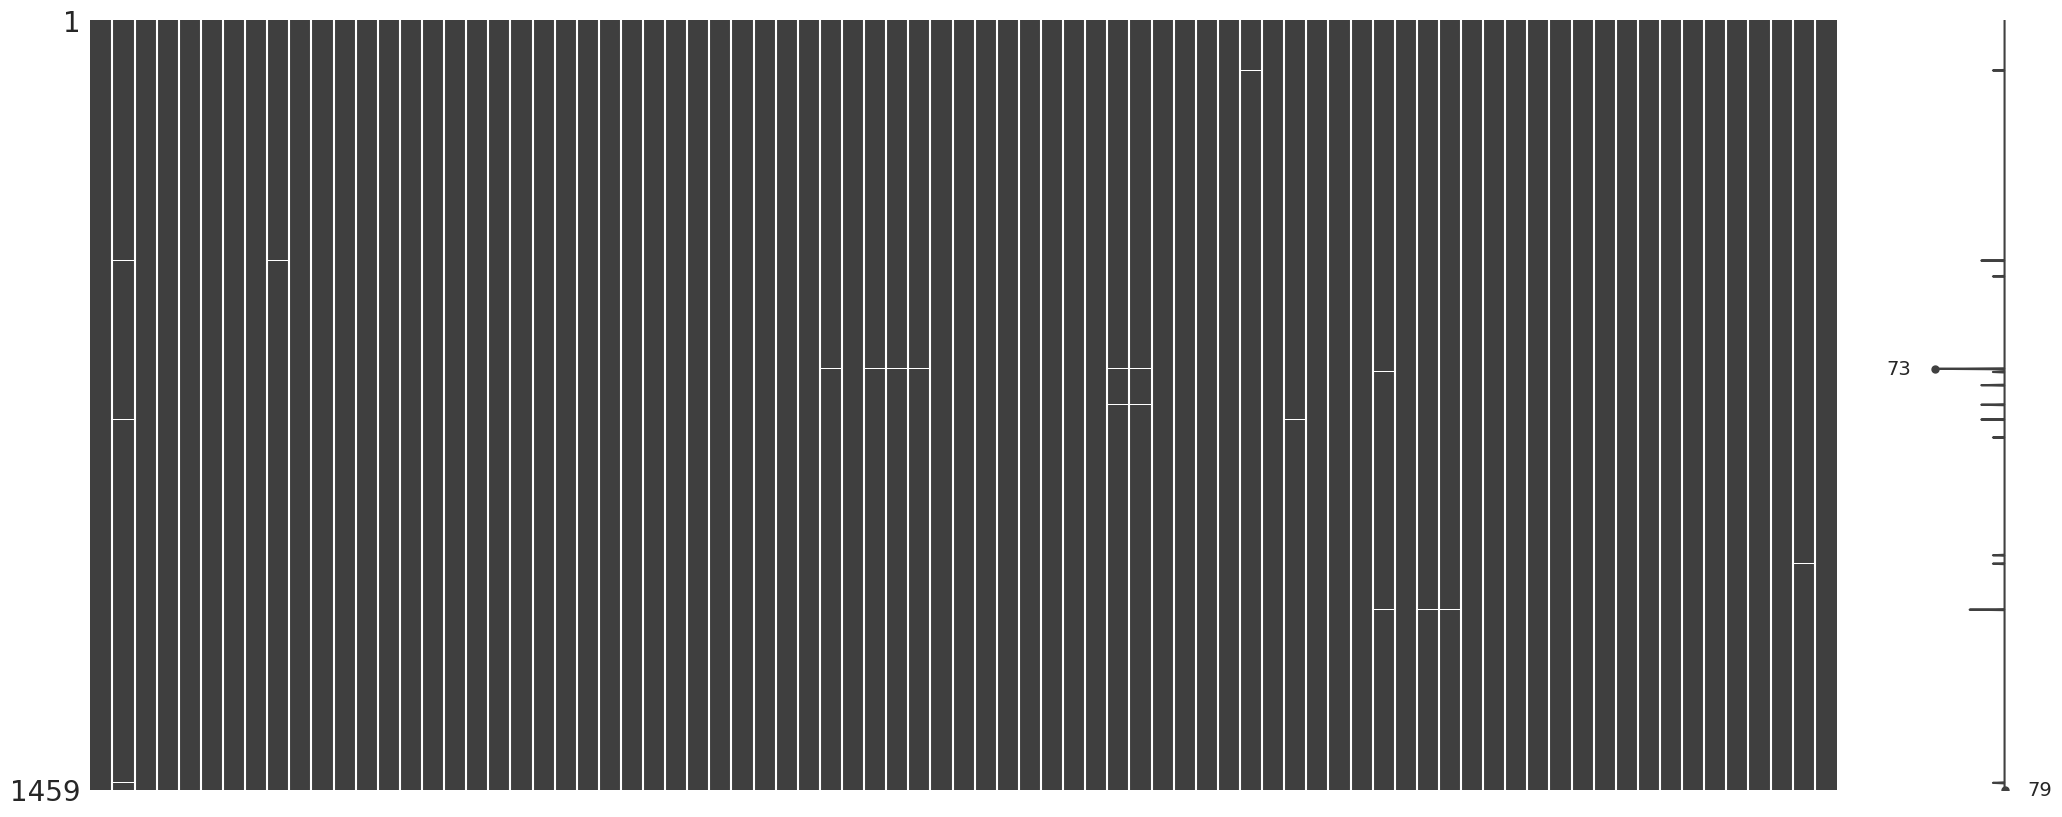

In [52]:
# Visualize missing values
msno.matrix(submission_data)

In [53]:
# Check the columns with missing values
print(submission_data.columns[submission_data.isna().sum() > 0])

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SaleType'],
      dtype='object')


### Second Cleaning of Missing Values

In [54]:
submission_data.loc[submission_data['BsmtFinSF1'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement


In [55]:
submission_data.loc[submission_data['BsmtFinSF2'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement


In [56]:
submission_data.loc[submission_data['BsmtUnfSF'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement


In [57]:
submission_data.loc[submission_data['TotalBsmtSF'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement


In [58]:
submission_data.loc[submission_data['BsmtFullBath'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement
728,No basement,No basement


In [59]:
submission_data.loc[submission_data['BsmtHalfBath'].isna(), ['BsmtFinType1', 'BsmtFinType2']]

,BsmtFinType1,BsmtFinType2
660,No basement,No basement
728,No basement,No basement


In [60]:
submission_data.loc[submission_data['KitchenQual'].isna(), ['KitchenAbvGr', 'OverallQual']]

,KitchenAbvGr,OverallQual
95,1,5


In [61]:
submission_data.loc[submission_data['GarageYrBlt'].isna(), ['GarageCars', 'GarageArea']]

,GarageCars,GarageArea
666,1.0,360.0
1116,NaN,NaN


In [62]:
submission_data.loc[submission_data['GarageCars'].isna(), ['GarageYrBlt', 'GarageArea', 'GarageType', "GarageFinish", 'GarageQual']]

,GarageYrBlt,GarageArea,GarageType,GarageFinish,GarageQual
1116,NaN,NaN,Detchd,No Garage,No Garage


In [63]:
submission_data.at[1116,'GarageYrBlt'] = 0.0
submission_data.at[1116,'GarageType'] = "No Garage"

In [64]:
submission_data.loc[submission_data['GarageYrBlt'].isna(), ['YearBuilt', 'YearRemodAdd',"YrSold"]]

,YearBuilt,YearRemodAdd,YrSold
666,1910,1983,2008


In [65]:
submission_data.at[666,'GarageYrBlt'] = 1910.0

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

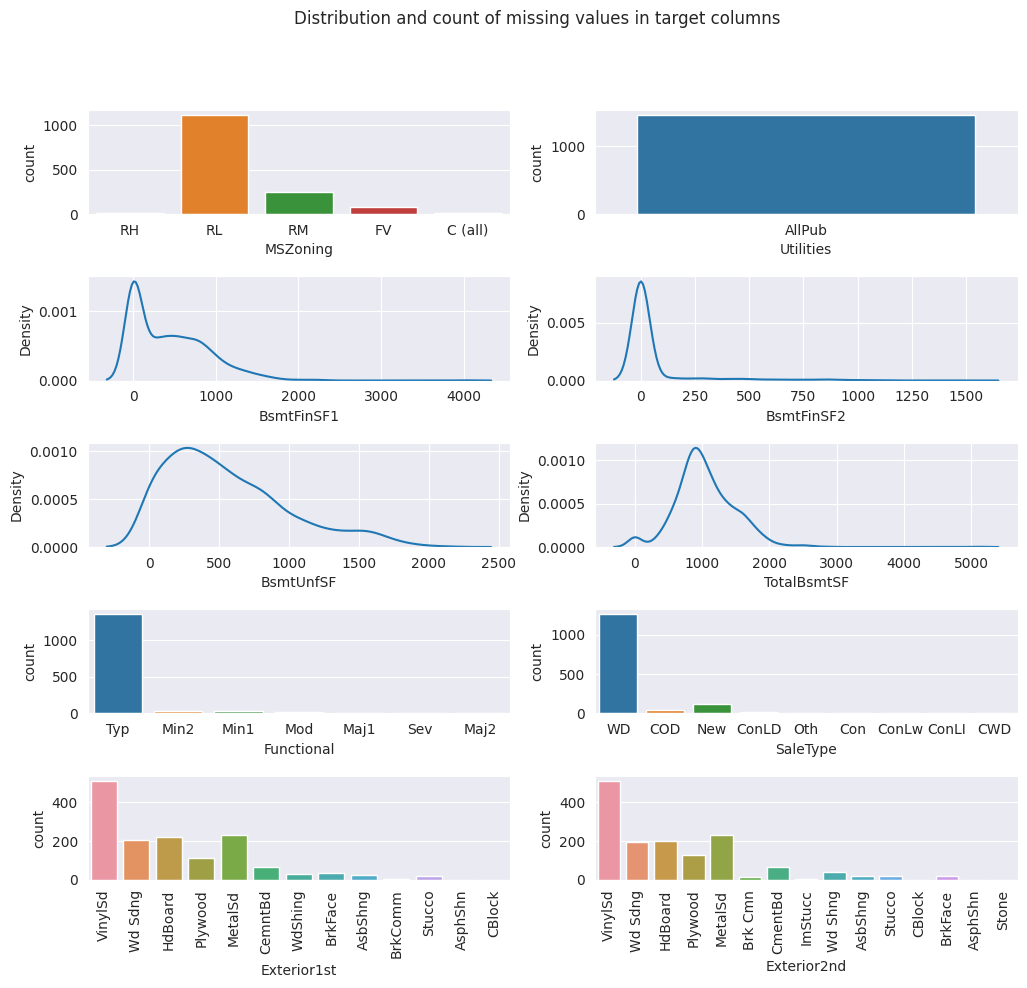

In [66]:
fig, axs = plt.subplots(5,2, figsize=(12, 10))
sns.countplot(data=submission_data, x='MSZoning', ax=axs[0,0])
sns.countplot(data=submission_data, x='Utilities', ax=axs[0,1])
sns.kdeplot(data=submission_data, x='BsmtFinSF1', ax=axs[1,0])
sns.kdeplot(data=submission_data, x='BsmtFinSF2', ax=axs[1,1])
sns.kdeplot(data=submission_data, x='BsmtUnfSF', ax=axs[2,0])
sns.kdeplot(data=submission_data, x='TotalBsmtSF', ax=axs[2,1])
sns.countplot(data=submission_data, x='Functional', ax=axs[3,0])
sns.countplot(data=submission_data, x='SaleType', ax=axs[3,1])
sns.countplot(data=submission_data, x='Exterior1st', ax=axs[4,0])
sns.countplot(data=submission_data, x='Exterior2nd', ax=axs[4,1])

for ax in axs[4]:
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.suptitle("Distribution and count of missing values in target columns")
plt.subplots_adjust(hspace=0.6, wspace=0.2)
plt.show()

In [67]:
target_missing_columns = {
    "MSZoning": "RL",
    "Utilities": "AllPub",
    "Exterior1st": "VinylSd",
    "Exterior2nd": "VinylSd",    
    "Functional": "Typ",
    "SaleType": "WD",
    "KitchenQual": "TA",    
}

# Dependent columns
missing_dependent_columns = {
    "BsmtFinSF1": ["BsmtFinType1", "No basement"],
    "BsmtFinSF2": ["BsmtFinType2", "No basement"],
    "BsmtUnfSF": ["BsmtFinType1", "No basement"],
    "TotalBsmtSF": ["BsmtFinType1", "No basement"],
    "BsmtFullBath": ["BsmtFinType1", "No basement"],
    "BsmtHalfBath": ["BsmtFinType1", "No basement"],
    "GarageCars": ["GarageQual", "No Garage"],
    "GarageArea": ["GarageQual", "No Garage"]       
}

In [68]:
for dependent_column, (column, value) in missing_dependent_columns.items():
    submission_data.loc[submission_data[column] == value, dependent_column] = 0 

for column, fill_value in target_missing_columns.items():    
    submission_data[column] = submission_data[column].fillna(fill_value) 

<Axes: >

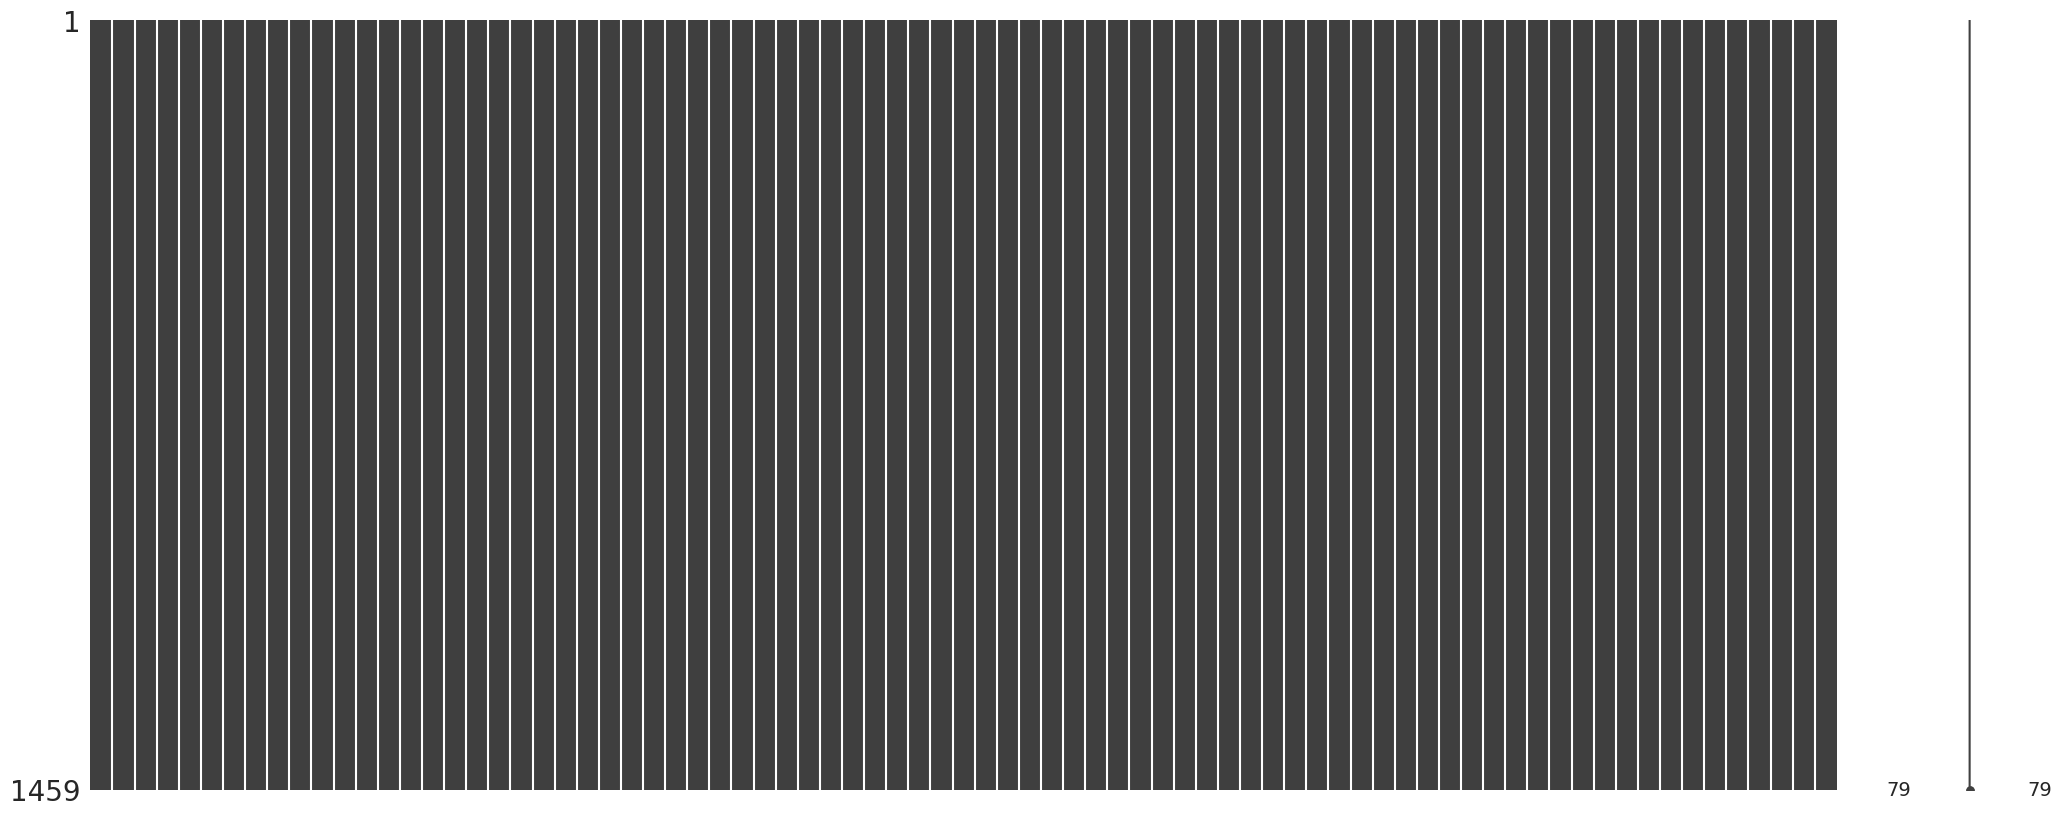

In [69]:
# Visualize missing values
msno.matrix(submission_data)

## Correction of Fields

In [70]:
# Categorical columns
categorical_columns = (
    "MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", \
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", \
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", \
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", \
    "KitchenQual", "Functional", \
    "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", \
    "MiscFeature", "YrSold", "SaleType", "SaleCondition"    
)
# Columns with natural label encoder
auto_label_encoder = [
    "OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", \
    "FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", \
    "Fireplaces", "GarageCars", "MoSold"
]

In [71]:
def change_dtype(dataset, column, type):
    """
        To change the type of the columns of the dataset
        Args:
            dataset (pandas DataFrame)
            column (string): Columns to change
            type (string): New type for the columns
    """
    return dataset[column].astype(type)

# Convert to categorical type
for cat_column in categorical_columns:
    submission_data[cat_column] = change_dtype(submission_data, cat_column, "object")

## Preprocessing Data

### Convert to Label Encoding

In [72]:
# List of categorical columns to Label Encoder
target_le_columns = (
    "MSSubClass", "LotShape", "LandContour", "LandSlope", \
    "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", \
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", \
    "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual", \
    "GarageCond", "PavedDrive", "PoolQC", "Fence", "YrSold"    
)

In [73]:
from sklearn.preprocessing import LabelEncoder

for column in target_le_columns:
    # Encoder
    encoder = LabelEncoder()    
    submission_data[column] = encoder.fit_transform(submission_data[column].values)
submission_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,RH,80.0,11622,Pave,No Alley,3,3,AllPub,Inside,...,120,0,2,2,None,0,6,4,WD,Normal
1,0,RL,81.0,14267,Pave,No Alley,0,3,AllPub,Corner,...,0,0,2,4,Gar2,12500,6,4,WD,Normal
2,5,RL,74.0,13830,Pave,No Alley,0,3,AllPub,Inside,...,0,0,2,2,None,0,3,4,WD,Normal
3,5,RL,78.0,9978,Pave,No Alley,0,3,AllPub,Inside,...,0,0,2,4,None,0,6,4,WD,Normal
4,11,RL,43.0,5005,Pave,No Alley,0,1,AllPub,Inside,...,144,0,2,4,None,0,1,4,WD,Normal


**<p style="font-size:16px">Transform to Normal distribution using 1 + log(x)</p>**

In [74]:
numeric_feats = submission_data.dtypes[submission_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = submission_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
3SsnPorch,12.511336
LandSlope,4.963280
EnclosedPorch,4.664371
KitchenAbvGr,4.074860
BsmtFinSF2,4.038796
ScreenPorch,3.784349
BsmtHalfBath,3.779085


In [75]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to correct".format(skewness.shape[0]))

skewed_features = skewness.index

for feat in skewed_features:    
    submission_data[feat] = np.log1p(submission_data[feat])

There are 55 skewed numerical features to correct


**<p style="font-size:16px">Convert Categorical Variables to Dummy Variables</p>**

In [76]:
submission_data = pd.get_dummies(submission_data)
submission_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,4.394449,9.360741,1.386294,1.386294,0.0,1.791759,1.945910,7.581720,7.581720,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,4.406719,9.565775,0.000000,1.386294,0.0,1.945910,1.945910,7.580189,7.580189,...,False,False,False,True,False,False,False,False,True,False
2,1.791759,4.317488,9.534668,0.000000,1.386294,0.0,1.791759,1.791759,7.599902,7.600402,...,False,False,False,True,False,False,False,False,True,False
3,1.791759,4.369448,9.208238,0.000000,1.386294,0.0,1.945910,1.945910,7.600402,7.600402,...,False,False,False,True,False,False,False,False,True,False
4,2.484907,3.784190,8.518392,0.000000,0.693147,0.0,2.197225,1.791759,7.597396,7.597396,...,False,False,False,True,False,False,False,False,True,False


## Reorder unmatched columns between the train data and submission data.

In [77]:
train_columns = X.columns
train_columns = train_columns[:-1]
submission_columns = submission_data.columns
missing_columns = [(i,col) for i,col in enumerate(train_columns) if col not in submission_columns]
print("Position and name of unmatched columns \n")
print(missing_columns)

Position and name of unmatched columns 

[(66, 'Utilities_NoSeWa'), (111, 'Condition2_RRAe'), (112, 'Condition2_RRAn'), (113, 'Condition2_RRNn'), (122, 'HouseStyle_2.5Fin'), (134, 'RoofMatl_Membran'), (135, 'RoofMatl_Metal'), (136, 'RoofMatl_Roll'), (147, 'Exterior1st_ImStucc'), (150, 'Exterior1st_Stone'), (164, 'Exterior2nd_Other'), (181, 'Heating_Floor'), (185, 'Heating_OthW'), (192, 'Electrical_Mix'), (212, 'MiscFeature_TenC')]


**Adding missing columns**

In [78]:
new_column = pd.Series([False] * submission_data.shape[0])
for column in missing_columns:    
    submission_data.insert(loc=column[0], column=column[1], value=new_column)    

**Change order of Condition2_PosN and Condition2_PosA columns in submission data**

In [79]:
# Fill mising columns after dummies convertion
Condition2_PosN_column = submission_data.iloc[:,110]
Condition2_PosA_column = submission_data.iloc[:,109]
first_div_subm = submission_data.iloc[:,:109]
second_div_subm = submission_data.iloc[:,111:]
first_div_subm = pd.concat([first_div_subm, Condition2_PosN_column], axis=1)
first_div_subm = pd.concat([first_div_subm, Condition2_PosA_column], axis=1)
submission_data = pd.concat([first_div_subm, second_div_subm], axis=1)
submission_data.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.000000,4.394449,9.360741,1.386294,1.386294,0.0,1.791759,1.945910,7.581720,7.581720,...,False,False,False,True,False,False,False,False,True,False
1,0.000000,4.406719,9.565775,0.000000,1.386294,0.0,1.945910,1.945910,7.580189,7.580189,...,False,False,False,True,False,False,False,False,True,False
2,1.791759,4.317488,9.534668,0.000000,1.386294,0.0,1.791759,1.791759,7.599902,7.600402,...,False,False,False,True,False,False,False,False,True,False
3,1.791759,4.369448,9.208238,0.000000,1.386294,0.0,1.945910,1.945910,7.600402,7.600402,...,False,False,False,True,False,False,False,False,True,False
4,2.484907,3.784190,8.518392,0.000000,0.693147,0.0,2.197225,1.791759,7.597396,7.597396,...,False,False,False,True,False,False,False,False,True,False


## Predictions

In [80]:
xgboost_pred = xgboost_model.predict(submission_data)
gbr_pred = gbr_model.predict(submission_data)

final_predictions = 0.5 * gbr_pred + 0.5 * xgboost_pred

**Transform Sale Price to the original scale**

In [81]:
final_predictions = np.expm1(final_predictions)

**Submission File**

In [82]:
submission = pd.DataFrame()
submission['Id'] = submission_data_Id
submission['SalePrice'] = final_predictions
submission.to_csv('submission.csv',index=False)